## Assignment 30_1
### ACD MDS (Mar 2018 batch) Student: K. Anandaranga
### CLUSTERING

In [1]:
#In this assignment students have to compress racoon grey scale image into 5 clusters. 
#In the end, visualize both raw and compressed image and look for quality difference.
#The raw image is available in scipy.misc package with the name face.

#### Import libraries

In [2]:
import numpy as np
from sklearn import cluster, datasets
from scipy import misc

import scipy as sp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

#### Import data

#### First, use the color picture to cluster

In [3]:
face_color = sp.misc.face()

In [4]:
face_color.shape

(768, 1024, 3)

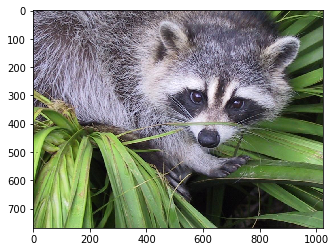

In [5]:
plt.imshow(face_color)

In [6]:
face_color_r = (face_color / 255.0).reshape(-1,3)

In [7]:
face_color_r.shape

(786432, 3)

In [8]:
k_colors = KMeans(n_clusters=5).fit(face_color_r)
y_pred=k_colors.predict(face_color_r)

In [9]:
k_colors.cluster_centers_.shape

(5, 3)

In [10]:
k_colors.labels_.shape

(786432,)

In [11]:
newimg=k_colors.cluster_centers_[k_colors.labels_]

In [12]:
newimg.shape

(786432, 3)

In [13]:
newimg=np.reshape(newimg, (face_color.shape))

In [14]:
newimg.shape

(768, 1024, 3)

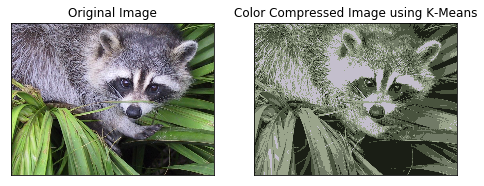

In [15]:
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,2,1,xticks=[],yticks=[],title='Original Image')
ax.imshow(face_color)
ax=fig.add_subplot(1,2,2,xticks=[],yticks=[],title='Color Compressed Image using K-Means')
ax.imshow(newimg)
plt.show()

#### The above comparison shows that K = 5 clusters provides sufficient quality
#### Now, we can repeat this using gray-scale picture of the same racoon

In [16]:
face_gray = sp.misc.face(gray = True)
face_gray.shape

(768, 1024)

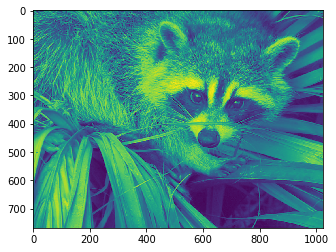

In [17]:
plt.imshow(face_gray)

#### We begin by fitting into 5 clusters

In [18]:
k_gray = KMeans(n_clusters=5).fit(face_gray)
y_pred=k_gray.predict(face_gray)
k_gray.cluster_centers_.shape

(5, 1024)

In [19]:
k_gray.labels_.shape

(768,)

In [20]:
newimg_gray = k_gray.cluster_centers_[k_gray.labels_]
newimg_gray.shape

(768, 1024)

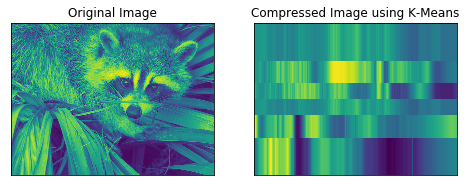

In [21]:
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,2,1,xticks=[],yticks=[],title='Original Image')
ax.imshow(face_gray)
ax=fig.add_subplot(1,2,2,xticks=[],yticks=[],title='Compressed Image using K-Means')
ax.imshow(newimg_gray)
plt.show()

#### The comparison of the two pictures shows that K = 5 clusters is not good enough; let us now re-run the same code using a higher value of K

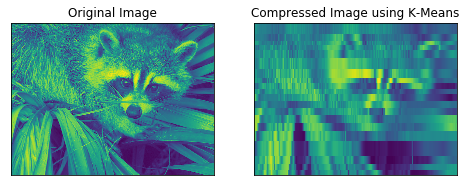

In [22]:
# Trial 2 using K = 20

k_gray_2 = KMeans(n_clusters=20).fit(face_gray)
y_pred=k_gray_2.predict(face_gray)

newimg_gray_2 = k_gray_2.cluster_centers_[k_gray_2.labels_]

fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,2,1,xticks=[],yticks=[],title='Original Image')
ax.imshow(face_gray)
ax=fig.add_subplot(1,2,2,xticks=[],yticks=[],title='Compressed Image using K-Means')
ax.imshow(newimg_gray_2)
plt.show()

#### With 20 clusters, the picture is readable, but the quality is not good; let us increase the cluster size to a higher number

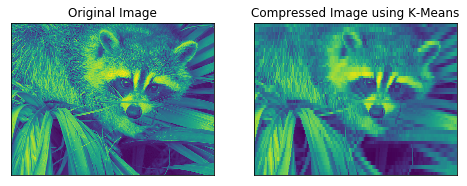

In [23]:
# Trial 3 using K = 50

k_gray_3 = KMeans(n_clusters=50).fit(face_gray)
y_pred=k_gray_3.predict(face_gray)

newimg_gray_3 = k_gray_3.cluster_centers_[k_gray_3.labels_]

fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,2,1,xticks=[],yticks=[],title='Original Image')
ax.imshow(face_gray)
ax=fig.add_subplot(1,2,2,xticks=[],yticks=[],title='Compressed Image using K-Means')
ax.imshow(newimg_gray_3)
plt.show()

#### We get much better quality when K = 50